In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = '/home/usman/Documents/UdacityProjects/Project2/Downloadables_3/TitanicData/titanic_data.csv'
data_df = pd.read_csv(filename)

In [4]:
data_df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [22]:
#add a new column where passengers with age less than 18 are classified as children
data_df['Child'] = (data_df['Age'] < 18)


#Break up the data into two data sets. One data sets for all the passengers less than 18 yyears old and one for all
#above or equal to 18
children_on_titanic = data_df[data_df.Age < 18]
adults_on_titanic = data_df[data_df.Age >= 18]

In [23]:
total_number_of_adult_males = (adults_on_titanic['Sex']=='male').sum()
total_number_of_adult_females = (adults_on_titanic['Sex']=='female').sum()
total_number_of_children = len(children_on_titanic)

adults_data_by_sex = adults_on_titanic.groupby(['Sex']).sum()
total_number_of_adults_males_survived = adults_data_by_sex['Survived']['male']
total_number_of_adult_females_survived = adults_data_by_sex['Survived']['female']

total_number_of_children_survived = (children_on_titanic['Survived'] == 0).sum()

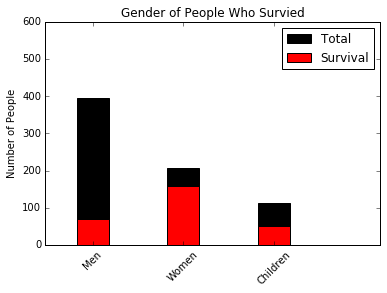

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

##the data
total = [total_number_of_adult_males, total_number_of_adult_females, total_number_of_children]
survival = [total_number_of_adults_males_survived, total_number_of_adult_females_survived, 
            total_number_of_children_survived]

ind = np.arange(len(total)) 
width = 0.35

rects1 = ax.bar(ind, total, width, color = 'black')
rects2 = ax.bar(ind, survival, width, color = 'red')

'''Make a bar graph showing total males and females and the number who survived'''
#the bars
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,600)
ax.set_ylabel('Number of People')
ax.set_title('Gender of People Who Survied')
xTickMarks = ['Men', 'Women', 'Children']
ax.set_xticks(ind+width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (rects1[0], rects2[0]), ('Total', 'Survival') )

In [27]:
#break down adults data by cabin class
first_class_adult_passengers = adults_on_titanic[(adults_on_titanic.Pclass == 1)]
second_class_adult_passengers = adults_on_titanic[(adults_on_titanic.Pclass == 2)]
third_class_adult_passengers = adults_on_titanic[(adults_on_titanic.Pclass == 3)]

In [29]:
#break down children data by cabin class
first_class_children_passengers = children_on_titanic[(children_on_titanic.Pclass == 1)]
second_class_children_passengers = children_on_titanic[(children_on_titanic.Pclass == 2)]
third_class_children_passengers = children_on_titanic[(children_on_titanic.Pclass == 3)]

In [51]:
Men_in_first_class = (first_class_adult_passengers['Sex']=='male').sum()
Women_in_first_class = (first_class_adult_passengers['Sex']=='female').sum()
children_in_first_class = len(first_class_children_passengers)

Men_in_second_class = (second_class_adult_passengers['Sex']=='male').sum()
Women_in_second_class = (second_class_adult_passengers['Sex']=='female').sum()
children_in_second_class = len(second_class_children_passengers)

Men_in_third_class = (third_class_adult_passengers['Sex']=='male').sum()
Women_in_third_class = (third_class_adult_passengers['Sex']=='female').sum()
children_in_third_class = len(third_class_children_passengers)

print( children_in_third_class )

78


In [48]:
#class data by sex

first_class_adults_data_by_sex = first_class_adult_passengers.groupby(['Sex']).sum()
second_class_adults_data_by_sex = second_class_adult_passengers.groupby(['Sex']).sum()
third_class_adults_data_by_sex = third_class_adult_passengers.groupby(['Sex']).sum()

In [49]:
#Survival of men and women by class
first_class_adult_men_survived = first_class_adults_data_by_sex['Survived']['male']
first_class_adult_women_survived = first_class_adults_data_by_sex['Survived']['female']
first_class_children_survived = (first_class_children_passengers['Survived'] == 1).sum()

second_class_adult_men_survived = second_class_adults_data_by_sex['Survived']['male']
second_class_adult_women_survived = second_class_adults_data_by_sex['Survived']['female']
second_class_children_survived = (second_class_children_passengers['Survived'] == 1).sum()

third_class_adult_men_survived = third_class_adults_data_by_sex['Survived']['male']
third_class_adult_women_survived = third_class_adults_data_by_sex['Survived']['female']
third_class_children_survived = (third_class_children_passengers['Survived'] == 1).sum()

In [52]:
total_Children = [children_in_first_class, children_in_second_class, children_in_third_class]
print(children_in_third_class)

78


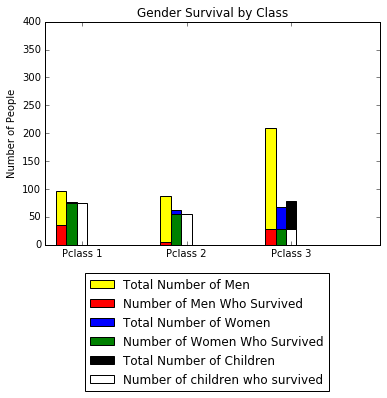

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

##the data
total_Men = [Men_in_first_class, Men_in_second_class, Men_in_third_class]
survival_Men = [first_class_adult_men_survived, second_class_adult_men_survived, third_class_adult_men_survived]

total_Women = [Women_in_first_class, Women_in_second_class, Women_in_third_class]
survival_Women = [first_class_adult_women_survived, second_class_adult_women_survived, 
                  third_class_adult_women_survived]

total_Children = [children_in_first_class, children_in_second_class, children_in_third_class]
survival_Children = [first_class_children_survived, second_class_children_survived, 
                     third_class_children_survived]

ind = np.arange(len(total_Men)) 
width = 0.1
width1 = 0.10
width2 = 0.20
width3 = 0.25

rects1 = ax.bar(ind, total_Men, width, color = 'yellow')
rects2 = ax.bar(ind, survival_Men, width, color = 'red')
rects3 = ax.bar(ind+width1, total_Women, width, color = 'blue')
rects4 = ax.bar(ind+width1, survival_Women, width, color = 'green')
rects5 = ax.bar(ind+width2, total_Children, width, color = 'black')
rects6 = ax.bar(ind+width2, survival_Women, width, color = 'white')

'''Make a bar graph showing total males and females and the number who survived'''
#the bars
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,400)
ax.set_ylabel('Number of People')
ax.set_title('Gender Survival by Class')
xTickMarks = ['Pclass 1', 'Pclass 2', 'Pclass 3']
ax.set_xticks(ind+0.25)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=0, fontsize=10)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), 
          ('Total Number of Men', 'Number of Men Who Survived', 
                                                          'Total Number of Women', 'Number of Women Who Survived',
          'Total Number of Children', 'Number of children who survived'),
         loc = "upper left", bbox_to_anchor = (0.1, -0.1) )

In [57]:
print('Percentage of men who survived in first class = ', first_class_adult_men_survived*100/Men_in_first_class)
print('Percentage of men who survived in second class = ', second_class_adult_men_survived*100/Men_in_second_class)
print('Percentage of men who survived in third class = ', third_class_adult_men_survived*100/Men_in_third_class)
print('\n')
print('Percentage of women who survived in first class = ', first_class_adult_women_survived*100/
      Women_in_first_class)
print('Percentage of women who survived in second class = ', second_class_adult_women_survived*100/
      Women_in_second_class)
print('Percentage of women who survived in third class = ', third_class_adult_women_survived*100/
      Women_in_third_class)

Percentage of men who survived in first class =  37.1134020619
Percentage of men who survived in second class =  6.81818181818
Percentage of men who survived in third class =  13.3333333333


Percentage of women who survived in first class =  97.4025974026
Percentage of women who survived in second class =  90.3225806452
Percentage of women who survived in third class =  41.7910447761


In [58]:
#Survival by age

#drop the data where the age of the passenger is not known
data_df_mod = data_df.dropna(subset = ['Age'])
len(data_df_mod)

714

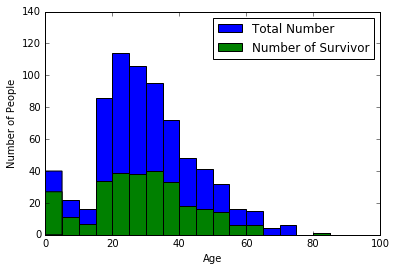

In [59]:
data_for_survival = data_df_mod[data_df_mod.Survived == 1]

plt.hist(data_df_mod['Age'], bins=20, range=(0,100), label='Total Number')
plt.hist(data_for_survival['Age'], bins=20, range=(0,100), label='Number of Survivor')
plt.ylabel('Number of People')
plt.xlabel('Age')
plt.axis([0, 100, 0, 140])
plt.legend()

In [60]:
data_by_age = data_df_mod.groupby('Age')
the_ages_of_people = data_by_age.dtypes.index
the_ages_of_people = pd.DataFrame(the_ages_of_people)

[-5, 100, -0.1, 1.1]

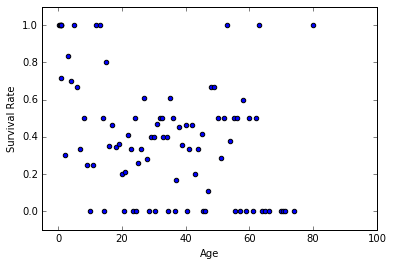

In [158]:
plt.scatter(the_ages_of_people, data_by_age['Survived'].mean())
plt.ylabel('Survival Rate')
plt.xlabel('Age')
plt.axis([-5, 100, -0.1,1.1])